In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

#set global settings 
pd.set_option("display.max_columns", 100)

print("Libraries loaded")


Libraries loaded


In [2]:
PROJECT = Path.cwd().parents[0]
CLEAN_DATA = PROJECT / "data" / "clean"
OUTPUTS = PROJECT / "outputs"

print("Project structure set:")
print("Clean data -->", CLEAN_DATA)
print("Outputs -->", OUTPUTS)

Project structure set:
Clean data --> /Users/juliaalie/Documents/app-market-analysis-1/data/clean
Outputs --> /Users/juliaalie/Documents/app-market-analysis-1/outputs


In [3]:
ios = pd.read_csv(CLEAN_DATA / "AppleStore_clean.csv")
android = pd.read_csv(CLEAN_DATA / "googleplaystore_clean.csv")

print(ios.shape)
print(android.shape)

(3220, 17)
(8862, 13)


In [5]:
ios.head()

,Unnamed: 0,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,2,281796108,Evernote - stay organized,158578688,USD,0.0,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1
1,3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.0,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1
2,4,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.0,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1
3,5,282935706,Bible,92774400,USD,0.0,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1
4,7,283646709,PayPal - Send and request money safely,227795968,USD,0.0,119487,879,4.0,4.5,6.12.0,4+,Finance,37,0,19,1


In [6]:
android.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
##Category or Genre Distribution

#for ios datasets
ios_count = ios["prime_genre"].value_counts()
ios_percentage = ios["prime_genre"].value_counts(normalize=True) * 100

ios_categories = pd.DataFrame({
    "count" : ios_count,
    "percentage" : ios_percentage
})

print(ios_categories)


                   count  percentage
prime_genre                         
Games               1872   58.136646
Entertainment        254    7.888199
Photo & Video        160    4.968944
Education            118    3.664596
Social Networking    106    3.291925
Shopping              84    2.608696
Utilities             81    2.515528
Sports                69    2.142857
Music                 66    2.049689
Health & Fitness      65    2.018634
Productivity          56    1.739130
Lifestyle             51    1.583851
News                  43    1.335404
Travel                40    1.242236
Finance               36    1.118012
Weather               28    0.869565
Food & Drink          26    0.807453
Reference             18    0.559006
Business              17    0.527950
Book                  14    0.434783
Navigation             6    0.186335
Medical                6    0.186335
Catalogs               4    0.124224


In [22]:
#for android datasets
android_count = android["Category"].value_counts()
android_percentage = android["Category"].value_counts(normalize=True) * 100

android_categories = pd.DataFrame({
    "count" : android_count,
    "percentage" : android_percentage
})

print(android_categories)

                     count  percentage
Category                              
FAMILY                1635   18.449560
GAME                   875    9.873618
TOOLS                  748    8.440533
BUSINESS               407    4.592643
LIFESTYLE              346    3.904311
PRODUCTIVITY           345    3.893026
FINANCE                328    3.701196
MEDICAL                312    3.520650
SPORTS                 301    3.396524
PERSONALIZATION        294    3.317536
COMMUNICATION          287    3.238547
HEALTH_AND_FITNESS     273    3.080569
PHOTOGRAPHY            261    2.945159
NEWS_AND_MAGAZINES     248    2.798465
SOCIAL                 236    2.663056
TRAVEL_AND_LOCAL       207    2.335816
SHOPPING               199    2.245543
BOOKS_AND_REFERENCE    190    2.143986
DATING                 165    1.861882
VIDEO_PLAYERS          158    1.782893
MAPS_AND_NAVIGATION    124    1.399233
EDUCATION              114    1.286391
FOOD_AND_DRINK         110    1.241255
ENTERTAINMENT          10

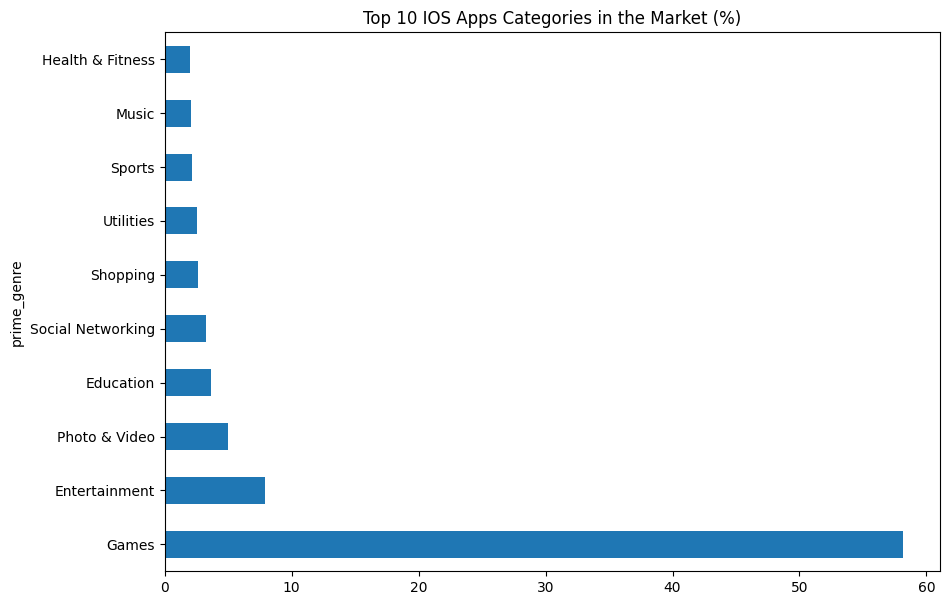

In [60]:
#plot visualization

#ios plot
ios_percentage.head(10).plot(
    kind="barh", figsize=(10,7), title="Top 10 IOS Apps Categories in the Market (%)"
)

plt.show()

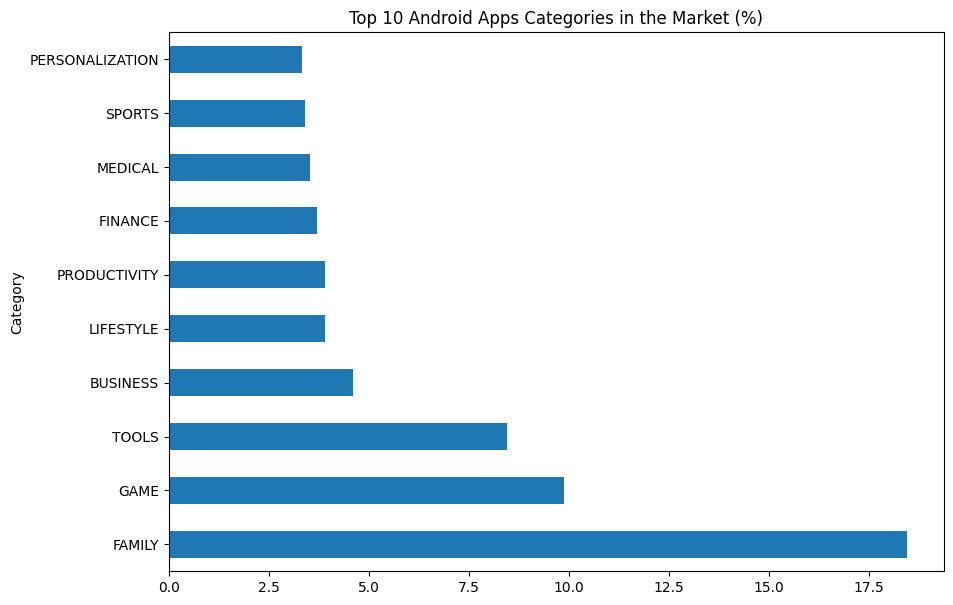

In [59]:
#android plot 
android_percentage.head(10).plot(
    kind="barh", figsize=(10,7), title="Top 10 Android Apps Categories in the Market (%)"
)

plt.show()

In [63]:
##Installs per Category (only for android)

android.dtypes #installs already an int64

#show average installs count per category
avg_installs = android.groupby("Category")["Installs"].mean().sort_values(ascending=False) 
avg_installs.head(10)




Category
COMMUNICATION         3.845612e+07
VIDEO_PLAYERS         2.485273e+07
SOCIAL                2.325365e+07
ENTERTAINMENT         2.113460e+07
PHOTOGRAPHY           1.780563e+07
PRODUCTIVITY          1.678733e+07
GAME                  1.583757e+07
TRAVEL_AND_LOCAL      1.398408e+07
TOOLS                 1.069525e+07
NEWS_AND_MAGAZINES    9.549178e+06
Name: Installs, dtype: float64

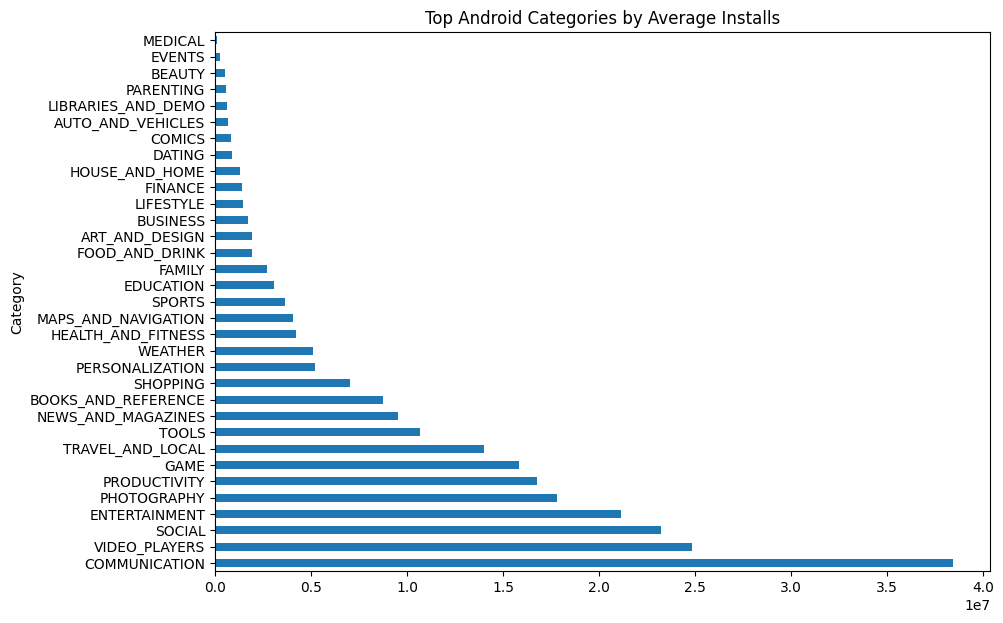

In [64]:
avg_installs.plot(
    kind="barh", figsize=(10,7), title="Top Android Categories by Average Installs"
)

plt.show()

In [ ]:
##Competition vs Popularity (for Android)
#examine categories that may have many apps in the market but low average installs OR 
#categories that may have fewer apps in the market but higher average installs (higher opportunities)

android_summary = android.groupby("Category").agg(
    num_apps=("App", "count"),
    avg_installs=("Installs", "mean")
).sort_values(by="avg_installs", ascending=False)

display(android_summary.head(10))

,num_apps,avg_installs
Category,,
COMMUNICATION,287,3.845612e+07
VIDEO_PLAYERS,158,2.485273e+07
SOCIAL,236,2.325365e+07
ENTERTAINMENT,100,2.113460e+07
PHOTOGRAPHY,261,1.780563e+07
PRODUCTIVITY,345,1.678733e+07
GAME,875,1.583757e+07
TRAVEL_AND_LOCAL,207,1.398408e+07
TOOLS,748,1.069525e+07


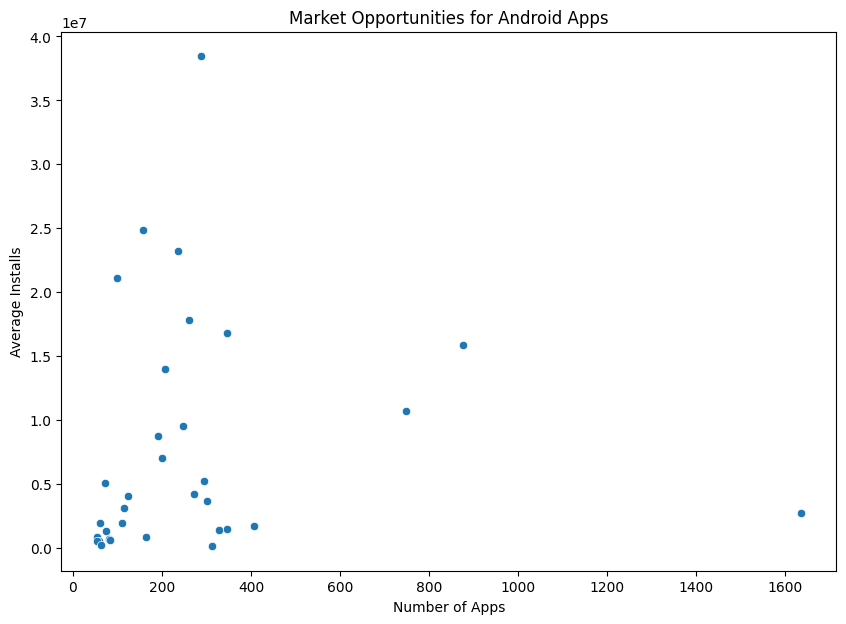

In [66]:
plt.figure(figsize=(10,7))
sns.scatterplot(data=android_summary, x="num_apps", y="avg_installs")
plt.title("Market Opportunities for Android Apps")
plt.xlabel("Number of Apps")
plt.ylabel("Average Installs")
plt.show()

In [68]:
##Average Ratings count per Category (for ios)
#examine categories that may have many apps in the market but low average installs OR 
#categories that may have fewer apps in the market but higher average installs (higher opportunities)
#note: I use total count of ratings for each apps for ios as "installs" since we don't have the actual data (assuming every user/most user rate the app)

ios.dtypes

avg_ratecount = ios.groupby("prime_genre")["rating_count_tot"].mean().sort_values(ascending=False) 
avg_ratecount.head(10)

prime_genre
Navigation           86090.333333
Reference            74942.111111
Social Networking    71548.349057
Music                57326.530303
Weather              52279.892857
Book                 39758.500000
Food & Drink         33333.923077
Finance              31467.944444
Photo & Video        28441.543750
Travel               28243.800000
Name: rating_count_tot, dtype: float64

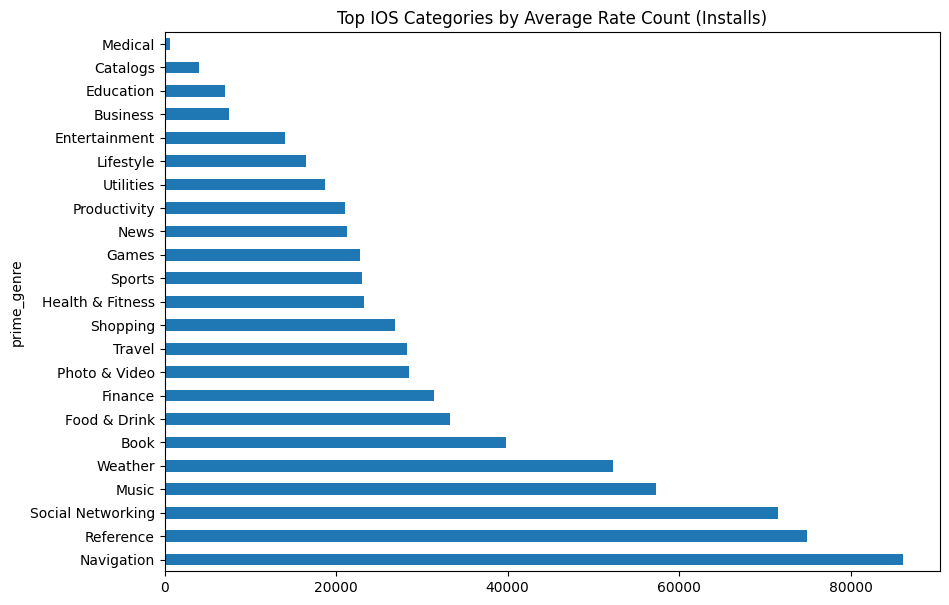

In [69]:
avg_ratecount.plot(
    kind="barh", figsize=(10,7), title="Top IOS Categories by Average Rate Count (Installs)"
)

plt.show()

In [73]:
##Competition vs Popularity (for IOS)

ios_summary = ios.groupby("prime_genre").agg(
    num_apps1=("track_name", "count"),
    avg_installs1=("rating_count_tot", "mean")
).sort_values(by="avg_installs1", ascending=False)

display(ios_summary.head(10))

,num_apps1,avg_installs1
prime_genre,,
Navigation,6,86090.333333
Reference,18,74942.111111
Social Networking,106,71548.349057
Music,66,57326.530303
Weather,28,52279.892857
Book,14,39758.500000
Food & Drink,26,33333.923077
Finance,36,31467.944444
Photo & Video,160,28441.543750


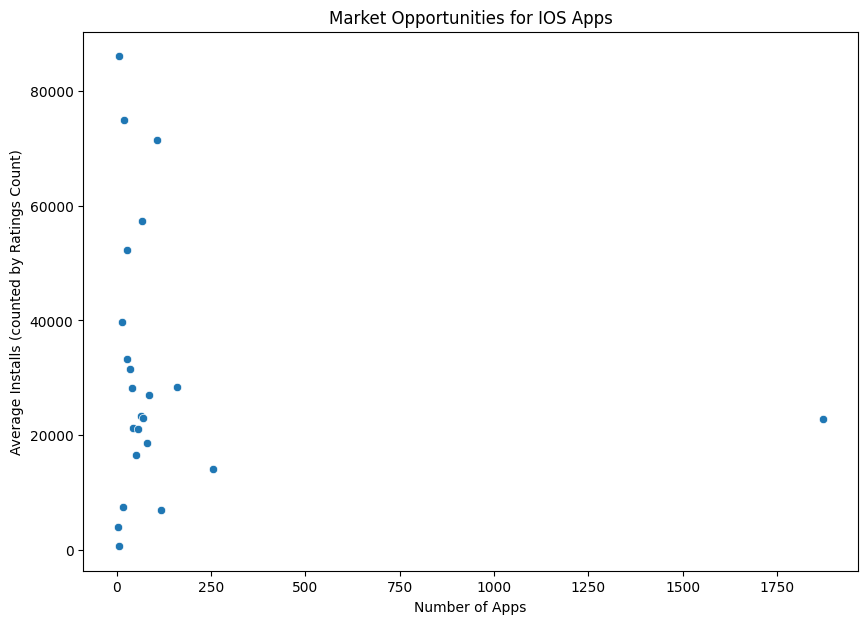

In [75]:
plt.figure(figsize=(10,7))
sns.scatterplot(data=ios_summary, x="num_apps1", y="avg_installs1")
plt.title("Market Opportunities for IOS Apps")
plt.xlabel("Number of Apps")
plt.ylabel("Average Installs (counted by Ratings Count)")
plt.show()

In [89]:
##AVERAGE RATINGS PER CATEGORY
#for ios dataset
ios_avg_rating = ios.groupby("prime_genre")["user_rating"].mean().sort_values(ascending=False)
display(ios_avg_rating)


prime_genre
Catalogs             4.125000
Games                4.037393
Productivity         4.000000
Business             3.970588
Shopping             3.970238
Music                3.946970
Photo & Video        3.903125
Navigation           3.833333
Health & Fitness     3.769231
Reference            3.666667
Education            3.635593
Food & Drink         3.634615
Social Networking    3.594340
Entertainment        3.539370
Utilities            3.530864
Travel               3.487500
Weather              3.482143
Lifestyle            3.411765
Finance              3.375000
News                 3.244186
Book                 3.071429
Sports               3.065217
Medical              3.000000
Name: user_rating, dtype: float64

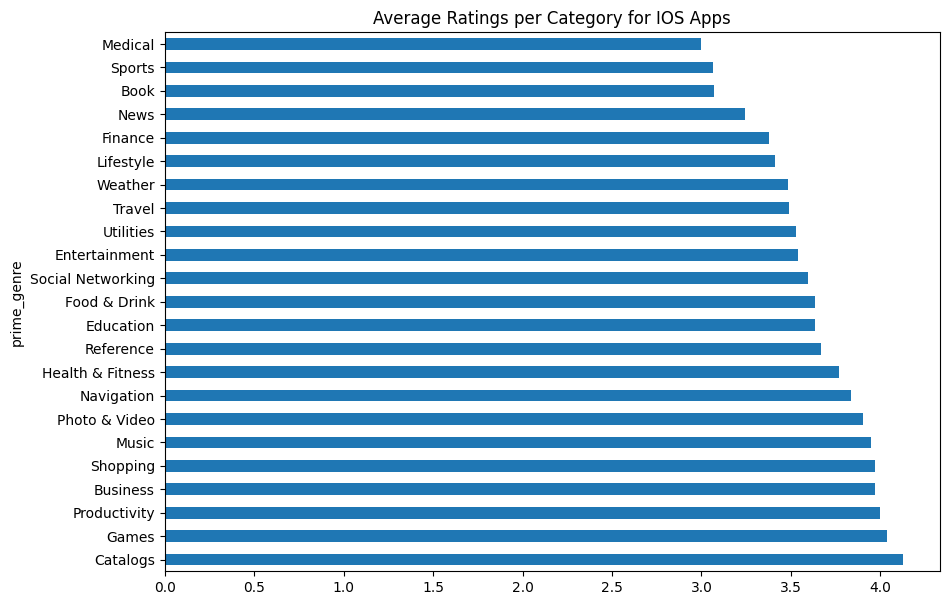

In [85]:
ios_avg_rating.plot(
    kind="barh", figsize=(10,7), title="Average Ratings per Category for IOS Apps"
)

plt.show()

In [83]:
#for android dataset
android_avg_rating = android.groupby("Category")["Rating"].mean().sort_values(ascending=False)
display(android_avg_rating)

Category
EVENTS                 4.435556
EDUCATION              4.348673
BOOKS_AND_REFERENCE    4.347799
PARENTING              4.339583
ART_AND_DESIGN         4.336842
PERSONALIZATION        4.300000
BEAUTY                 4.278571
SOCIAL                 4.252736
HEALTH_AND_FITNESS     4.236052
GAME                   4.235252
WEATHER                4.229231
SHOPPING               4.226966
SPORTS                 4.212605
AUTO_AND_VEHICLES      4.184722
PRODUCTIVITY           4.181915
LIBRARIES_AND_DEMO     4.178125
COMICS                 4.177358
FOOD_AND_DRINK         4.168478
FAMILY                 4.167175
PHOTOGRAPHY            4.166129
HOUSE_AND_HOME         4.150000
MEDICAL                4.147577
FINANCE                4.128374
COMMUNICATION          4.126923
ENTERTAINMENT          4.126000
NEWS_AND_MAGAZINES     4.104545
BUSINESS               4.103953
LIFESTYLE              4.082079
TRAVEL_AND_LOCAL       4.068156
VIDEO_PLAYERS          4.043056
MAPS_AND_NAVIGATION    4.039286

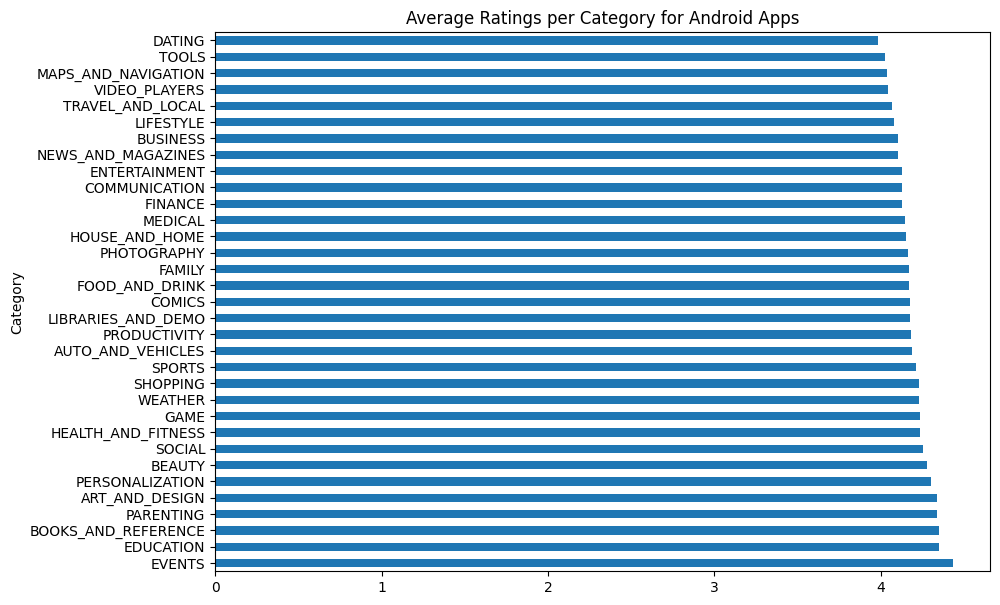

In [87]:
android_avg_rating.plot(
    kind="barh", figsize=(10,7), title="Average Ratings per Category for Android Apps"
)

plt.show()